---
title: "Week 7: Classification - K-NN, Decision tree"
author: "A Aniruddha"
format:
  html:
    theme: theme.scss
    toc: true
    html-math-method: katex
---

Colab Link: [Click here!](https://drive.google.com/file/d/17KFg_30CMnFVRhRcx1CrWFGBfhbCaNNd/view?usp=sharing){target="_blank"}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# KNN

### Generating the dataset

In [ ]:
rng = np.random.default_rng(seed = 1001)
X = rng.uniform(-10, 10, (100, 2))
y = np.int32(np.zeros(X.shape[0]))
y[X[:, 1] > X[:, 0]] = 1
X = np.concatenate((X,
                   rng.multivariate_normal([-5, 5], np.eye(2), 10)),
                   axis = 0)
y = np.concatenate((y, np.int32(np.zeros(10))))

### Visualize the dataset

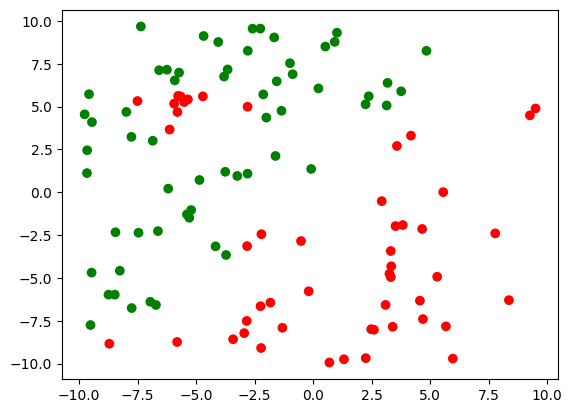

In [ ]:
c = np.array(['red', 'green'])
plt.scatter(X[:, 0], X[:, 1], c = c[y]);

### Predict the class for a test point

In [ ]:
def predict(X, y, x_test, k = 3):
    dist = np.linalg.norm(X - x_test.reshape(1, 2), axis = 1)
    nearest_k = np.argsort(dist)[: k]
    voter = y[nearest_k]
    if sum(voter) > len(voter) / 2:
        return 1
    else:
        return 0
c[predict(X, y, np.array([-3, -2]), 10)]

'green'

### Decision boundary for various values of k

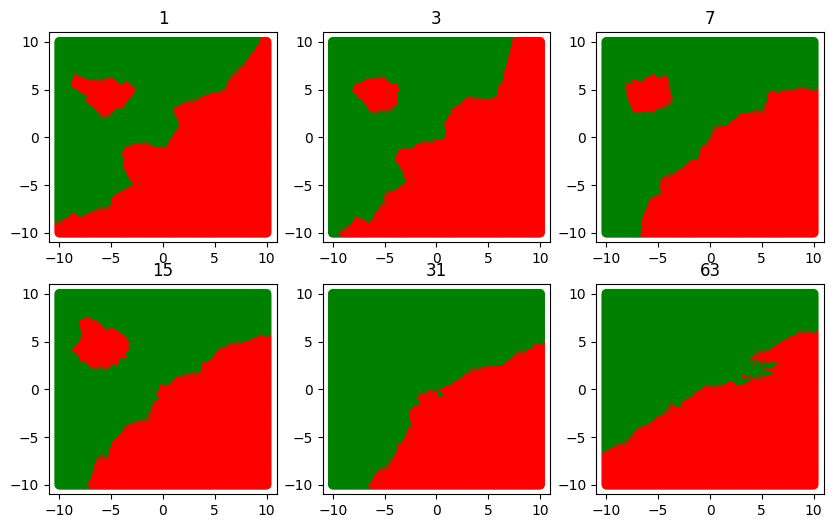

In [ ]:
def boundary(k):
    x = np.linspace(-10, 10, 100)
    floor = [ ]
    color = [ ]
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            floor.append([x[i], x[j]])
            color.append(c[predict(X, y, np.array([x[i], x[j]]), k)])
    floor = np.array(floor)
    plt.scatter(floor[:, 0], floor[:, 1], c = color);
    plt.title(k)

plt.figure(figsize=(10, 7))
for ind, k in enumerate([1, 3, 7, 15, 31, 63]):
    plt.subplot(2, 3, ind + 1)
    boundary(k)

## Real World Dataset: Wine Dataset

In this section, we will explore the Wine dataset, which is a real-world dataset used for classification tasks. The dataset contains various attributes related to wine samples, and our goal is to classify these samples into two categories: Class 0 and Class 1.

### Dataset Description

- Features: The dataset includes several features, but for this analysis, we will focus on two specific attributes: 'proline' and 'hue.' These attributes represent different characteristics of the wine samples.

- Labels: The target variable, denoted as 'y,' assigns each sample to one of two classes, Class 0 or Class 1.

In [ ]:
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True, as_frame=True)
X, y = X[y < 2], y[y < 2]
X = X[['proline', 'hue']]
X = X.to_numpy()

### Data Preprocessing

Before using the dataset, we perform some data preprocessing steps to standardize the features. Standardization is a common practice in machine learning to ensure that all features have the same scale. This can improve the performance of our models.

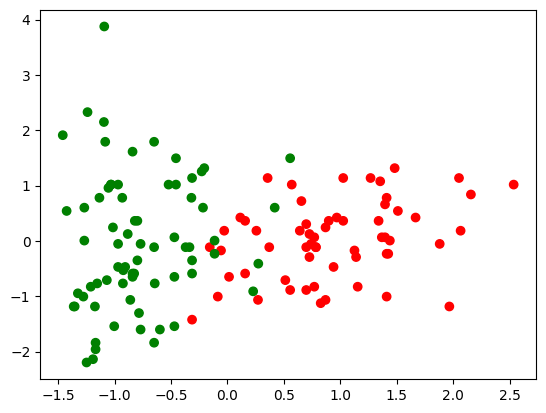

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

c = np.array(['red', 'green'])
plt.scatter(X[:, 0], X[:, 1], c = c[y]);

### Predict the class for a test point

In [ ]:
c[predict(X, y, np.array([-0.2, 0]), 5)]

'green'

### Decision boundary for various values of k

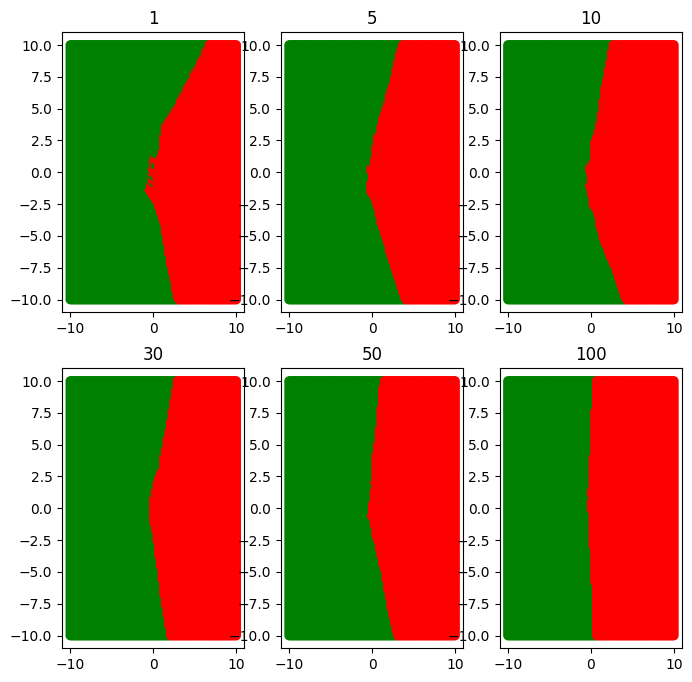

In [ ]:
plt.figure(figsize=(10, 7))
for ind, k in enumerate([1, 5, 10, 30, 50, 100]):
    plt.subplot(2, 3, ind + 1)
    boundary(k)

# Decision Trees

Consider a dataset X with 28 points that lie in a 2D space. The labels for each point is given by the vector y.

In [ ]:
X = np.array([[6, 1], [7, 1], [8, 1], [6, 2], [7, 2],
             [8, 2], [1, 6], [1, 7], [2, 6], [2, 8],
             [4, 6], [4, 8], [5, 6], [5, 7], [1, 1],
             [2, 1], [1, 2], [2, 2], [3, 3], [5, 3],
             [4, 4], [3, 5], [5, 5], [6, 6], [8, 6],
             [7, 7], [6, 8], [8, 8]]).T
y = np.array([1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1, -1, -1,
             -1, -1, -1, -1, -1, -1, -1])

### Visualize the dataset

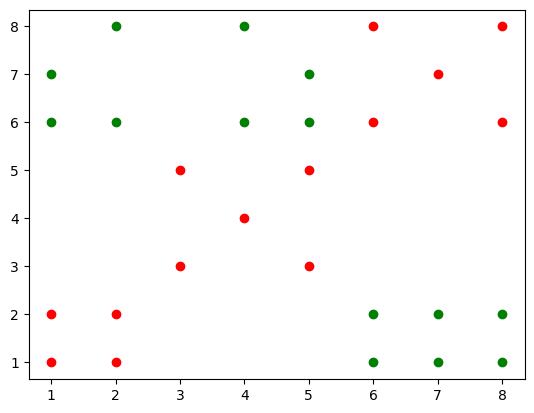

In [ ]:
plt.scatter(X[0, y==1], X[1, y==1], c="green")
plt.scatter(X[0, y==-1], X[1, y==-1], c="red")
plt.show()

The entropy of a node is given by,
$$E=-p\log p-( 1-p)\log( 1-p)$$

In [ ]:
def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

The information gain is given by,
$$IG=E - [\gamma * E_{l} + (1 - \gamma) * E_r]$$

In [ ]:
def IG(E, El, Er, gamma):
    return E - gamma * El - (1 - gamma) * Er

In [ ]:
def best_split(X, y):
    min_val, max_val = X.min(), X.max()
    vals = np.linspace(min_val, max_val, 10)
    p = X[y == 1].shape[0] / X.shape[0]
    E = entropy(p)
    ig_best, value_best, feat_best = 0, 0, 0
    for val in vals:
        for feat in [0, 1]:
            left = y[X[:, feat] < val]
            right = y[X[:, feat] >= val]
            gamma = left.shape[0] / X.shape[0]
            q = r = 0
            if left.shape[0] != 0:
                q = left[left == 1].shape[0] / left.shape[0]
            if right.shape[0] != 0:
                r = right[right == 1].shape[0] / right.shape[0]
            El = entropy(q)
            Er = entropy(r)
            ig = E - gamma * El - (1 - gamma) * Er
            assert ig >= 0
            if ig > ig_best:
                ig_best = ig
                value_best = val
                feat_best = feat
    return feat_best, value_best, ig_best

In [ ]:
X = X.T

tree = dict()

def grow_tree(X, y, key):
    p = X[y == 1].shape[0] / X.shape[0]
    E = entropy(p)
    if E <= 0.2:
        label = 0
        if y[y == 1].shape[0] / y.shape[0] > 0.5:
            label = 1
        tree[key] = {'state': 'leaf', 'label': label}
        return
    feat_best, val_best, _ = best_split(X, y)
    tree[key] = {'state': 'internal', 'question': (feat_best, val_best)}
    left_ind = X[:, feat_best] < val_best
    right_ind = X[:, feat_best] >= val_best
    left_X = X[left_ind]
    left_y = y[left_ind]
    right_X = X[right_ind]
    right_y = y[right_ind]
    grow_tree(left_X, left_y, 2 * key + 1)
    grow_tree(right_X, right_y, 2 * key + 2)

grow_tree(X, y, 0)
tree

{0: {'state': 'internal', 'question': (1, 5.666666666666667)},
 1: {'state': 'internal', 'question': (0, 5.666666666666667)},
 3: {'state': 'leaf', 'label': 0},
 4: {'state': 'leaf', 'label': 1},
 2: {'state': 'internal', 'question': (0, 5.666666666666667)},
 5: {'state': 'leaf', 'label': 1},
 6: {'state': 'leaf', 'label': 0}}

## Predict label for a test point

In [ ]:
def predict(tree, x, ind):
    if tree[ind]['state'] == 'leaf':
        return tree[ind]['label']
    feat, val = tree[ind]['question']
    if x[feat] < val:
        ind = 2 * ind + 1
        return predict(tree, x, ind)
    else:
        ind = 2 * ind + 2
        return predict(tree, x, ind)

c[predict(tree, [3, 4], 0)]

'red'

## Visualize the decision boundary

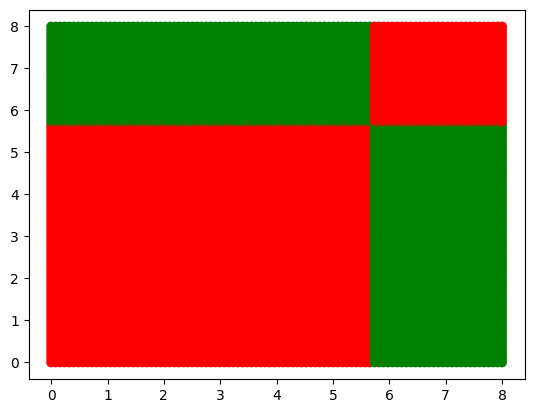

In [ ]:
x = np.linspace(0, 8, 100)
floor = [ ]
color = [ ]
for i in range(x.shape[0]):
    for j in range(x.shape[0]):
        floor.append([x[i], x[j]])
        color.append(c[predict(tree, [x[i], x[j]], 0)])
floor = np.array(floor)
plt.scatter(floor[:, 0], floor[:, 1], c = color);